In [ ]:
# https://towardsdatascience.com/clustering-documents-with-python-97314ad6a78d

In [1]:
import pandas as pd
import wikipedia

In [35]:
import pandas as pd
import wikipedia
articles=['Guidance, navigation, and control', 'Attitude Control', 'Control engineering', 'Robotics', 'Satellite navigation', 'Automatic control', 'Artificial intelligence', 'Spacecraft', 'Spaceflight', 'Astronautics']
wiki_lst=[]
title=[]
for article in articles:
    print("loading content: ",article)
    wiki_lst.append(wikipedia.page(article).content)
    title.append(article)
print("examine content")
wiki_lst

loading content:  Guidance, navigation, and control
loading content:  Attitude Control
loading content:  Control engineering
loading content:  Robotics
loading content:  Satellite navigation
loading content:  Automatic control
loading content:  Artificial intelligence
loading content:  Spacecraft
loading content:  Spaceflight
loading content:  Astronautics
examine content


['Guidance, navigation and control (abbreviated GNC,  GN&C, or G&C and within the context of NASA operations, often pronounced \'Gintsee\' or (IPA) ʤɪnsiː) is a branch of engineering dealing with the design of systems to control the movement of vehicles,  especially, automobiles, ships, aircraft, and spacecraft. In many cases these functions can be performed by trained humans. However, because of the speed of, for example, a rocket\'s dynamics, human reaction time is too slow to control this movement. Therefore, systems—now almost exclusively digital electronic—are used for such control. Even in cases where humans can perform these functions, it is often the case that GNC systems provide benefits such as alleviating operator work load, smoothing turbulence, fuel savings, etc.  In addition, sophisticated applications of GNC enable automatic or remote control.\n\nGuidance refers to the determination of the desired path of travel (the "trajectory") from the vehicle\'s current location to 

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(wiki_lst)
X

<10x6445 sparse matrix of type '<class 'numpy.float64'>'
	with 12530 stored elements in Compressed Sparse Row format>

In [37]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,10)

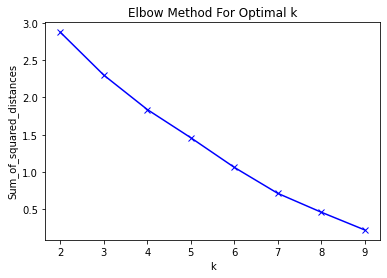

In [38]:
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [63]:
#trial with 6 clusters

true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                               title  cluster
4               Satellite navigation        0
1                   Attitude Control        1
7                         Spacecraft        1
8                        Spaceflight        1
2                Control engineering        2
0  Guidance, navigation, and control        3
3                           Robotics        4
5                  Automatic control        4
6            Artificial intelligence        4
9                       Astronautics        5


Cluster: 0
Titles
 Satellite navigation


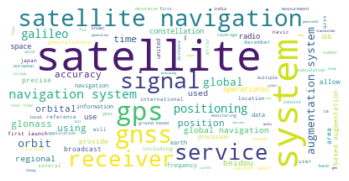

Cluster: 1
Titles
 Attitude Control
       Spacecraft
      Spaceflight


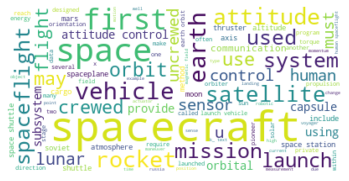

Cluster: 2
Titles
 Control engineering


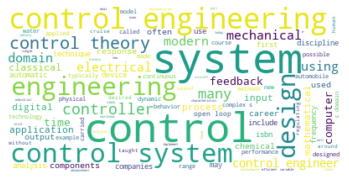

Cluster: 3
Titles
 Guidance, navigation, and control


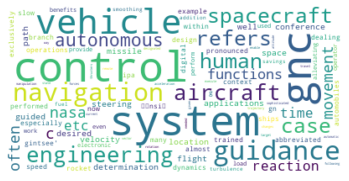

Cluster: 4
Titles
                Robotics
       Automatic control
 Artificial intelligence


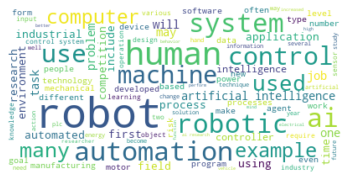

Cluster: 5
Titles
 Astronautics


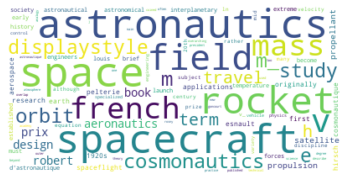

In [64]:
from wordcloud import WordCloud
result={'cluster':labels,'wiki':wiki_lst}
result=pd.DataFrame(result)
for k in range(0,true_k):
   s=result[result.cluster==k]
   text=s['wiki'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   print('Titles')
   titles=wiki_cl[wiki_cl.cluster==k]['title']         
   print(titles.to_string(index=False))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()